In [1]:
import numpy as np

In [2]:
# Początkowa forma danych: jeden element na próbkę
# (w tym przykładzie próbką jest zdanie, ale może ona być również całym dokumentem)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [5]:
# Zbuduj indeks wszystkich tokenów danych
token_index = {}
for sample in samples:
 # Tokenizacja próbek poprzez metodę podziału.
 # Podczas pracy z prawdziwymi danymi podziału dokonuje się również na znakach interpunkcyjnych i specjalnych
 for word in sample.split():
    if word not in token_index:
 # Przypisywanie unikatowego indeksu do każdego unikatowego słowa.
      token_index[word] = len(token_index) + 1
 # Zwróć uwagę na to, że indeks 0 nie jest przypisywany do żadnego słowa

In [6]:
# Wektoryzacja próbek. Bierzemy pod uwagę tylko max_length pierwszych słów każdej próbki.
max_length = 10

In [7]:
# Tu przechowujemy wyniki operacji:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.
 # ########################################################################################


In [8]:
#KODOWANIE ZNAKOW
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable # Wszystkie znaki ASCII, które można wyświetlić
token_index = dict(zip(characters, range(1, len(characters) + 1)))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.
# ########################################################################################

Gorąca jedynka przy użyciu narzędzi z pakietu Keras

In [9]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# Tworzy mechanizm tokenizacji skonfigurowany tak,
# aby brał pod uwagę tylko 1000 najczęściej występujących słów
tokenizer = Tokenizer(num_words=1000)
# Buduje indeks słów.
tokenizer.fit_on_texts(samples)
# Zamienia łańcuchy na listy indeksów (wartości całkowitoliczbowe)
sequences = tokenizer.texts_to_sequences(samples)

In [ ]:
# Możliwe jest również uzyskanie bezpośredniej binarnej reprezentacji kodowania metodą gorącej jedynki.
#Ten generator tokenów obsługuje także inne tryby wektoryzacji

In [10]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# Przykład kodu pozwalającego na uzyskanie dostępu do indeksu słów.
word_index = tokenizer.word_index
print('Znaleziono %s unikatowych tokenów.' % len(word_index))

Znaleziono 9 unikatowych tokenów.


In [11]:
# sztuczka haszowania z gorącą jedynką (ang. one-hot hashing trick).
#HASZOWANIE SŁÓW METODĄ GORACEJ JEDYNKI
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# Słowa są zapisywane w postaci wektorów o długości 1000.
# Jeżeli przetworzymy przykład, w którym znajduje się około 1000 różnych słów,
# to zauważymy wiele konfliktów haszy,
# które doprowadzą do pogorszenia dokładności tej metody kodowania.
dimensionality = 1000
max_length = 10

In [12]:
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
 # Słowom przypisywane są losowe wartości całkowite indeksu z zakresu od 0 do 1000.

        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1

In [14]:
#OSADZENIA SŁÓW (ang. word embeddings)- niska liczba wymiarów. Są to gęste wektory zmiennoprzecinkowe.
from keras.layers import Embedding
# Warstwa Embedding przyjmuje przynajmniej dwa argumenty:
# liczbę tokenów (tutaj 1000: 1 + maksymalny indeks słowa)
# i liczbę wymiarów osadzeń (tutaj 64).
embedding_layer = Embedding(1000, 64)
#Warstwę Embedding najlepiej jest rozumieć jako słownik mapujący całkowitoliczbowe indeksy oznaczające określone słowa na gęste wektory

In [15]:
from keras.datasets import imdb
from keras import preprocessing
# Liczba słów analizowanych w charakterze wag.
max_features = 10000
# Ucina recenzje, w których występuje ta liczba słów
# (słów zaliczanych do zbioru max_features najczęściej występujących słów).
maxlen = 20
# Ładuje dane w formie list wartości całkowitoliczbowych.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# Zamieniamy listy liczb całkowitych na dwuwymiarowy tensor
# wartości całkowitoliczbowych o kształcie (próbki, maxlen).
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# Określamy maksymalną długość danych wejściowych warstwy Embedding,
# co umożliwi późniejsze spłaszczenie osadzonych danych wejściowych.
model.add(Embedding(10000, 8, input_length=maxlen))
# Po przetworzeniu przez warstwę osadzania aktywacje mają kształt (próbki, maxlen, 8).
# Spłaszczanie trójwymiarowego tensora osadzeń
# w celu uzyskania dwuwymiarowego tensora o kształcie (próbki, maxlen * 8).
model.add(Flatten())
# Dodawanie ostatniej warstwy klasyfikatora.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.6642 - acc: 0.6335 - val_loss: 0.6086 - val_acc: 0.7060
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5346 - acc: 0.7529 - val_loss: 0.5219 - val_acc: 0.7344
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4613 - acc: 0.7854 - val_loss: 0.5006 - val_acc: 0.7456
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4261 - acc: 0.8059 - val_loss: 0.4934 - val_acc: 0.7584
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4028 - acc: 0.8176 - val_loss: 0.4942 - val_acc: 0.7566
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3830 - acc: 0.8281 - val_loss: 0.4962 - val_acc: 0.7568
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3654 - acc: 0.8406 - val_loss: 0.4998 - val_acc: 0.7606
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
#O wiele lepszym rozwiązaniem jest dodanie do osadzonej sekwencji rekurencyjnych warstw lub
#jednowymiarowych warstw konwolucyjnych — pozwoli to na uczenie się cech biorących pod uwagę
#całość sekwencji


In [18]:
#REKURENCYJNE SIECI NEURONOWE RNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # Ostatnia warstwa zwraca tylko ostatni obiekt wyjściowy
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328320 (1.25 MB)
Trainable params: 328320 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#WSTEPNA OBROKA DANYCH
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000 # Liczba słów traktowanych jako cechy.
maxlen = 500 # Ucina recenzje po tej liczbie słów należących do zbioru max_features słów najczęściej występujących w zbiorze.
batch_size = 32
print('Ładowanie danych...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'sekwencje treningowe')
print(len(input_test), 'sekwencje testowe')
print('Sekwencje (próbki x czas)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('Kształt obiektu input_train:', input_train.shape)
print('Kształt obiektu input_test:', input_test.shape)

Ładowanie danych...
25000 sekwencje treningowe
25000 sekwencje testowe
Sekwencje (próbki x czas)
Kształt obiektu input_train: (25000, 500)
Kształt obiektu input_test: (25000, 500)


Epoch 1/10
625/625 [==============================] - 80s 124ms/step - loss: 0.5084 - accuracy: 0.7523 - val_loss: 0.3910 - val_accuracy: 0.8386
Epoch 2/10
625/625 [==============================] - 76s 122ms/step - loss: 0.3401 - accuracy: 0.8605 - val_loss: 0.3487 - val_accuracy: 0.8484
Epoch 3/10
625/625 [==============================] - 75s 120ms/step - loss: 0.3040 - accuracy: 0.8794 - val_loss: 0.3711 - val_accuracy: 0.8500
Epoch 4/10
625/625 [==============================] - 79s 127ms/step - loss: 0.2496 - accuracy: 0.9036 - val_loss: 0.3567 - val_accuracy: 0.8690
Epoch 5/10
625/625 [==============================] - 75s 119ms/step - loss: 0.2351 - accuracy: 0.9103 - val_loss: 0.3507 - val_accuracy: 0.8486
Epoch 6/10
625/625 [==============================] - 76s 122ms/step - loss: 0.2016 - accuracy: 0.9244 - val_loss: 0.3751 - val_accuracy: 0.8522
Epoch 7/10
625/625 [==============================] - 76s 121ms/step - loss: 0.1808 - accuracy: 0.9322 - val_loss: 0.3735 - val_ac

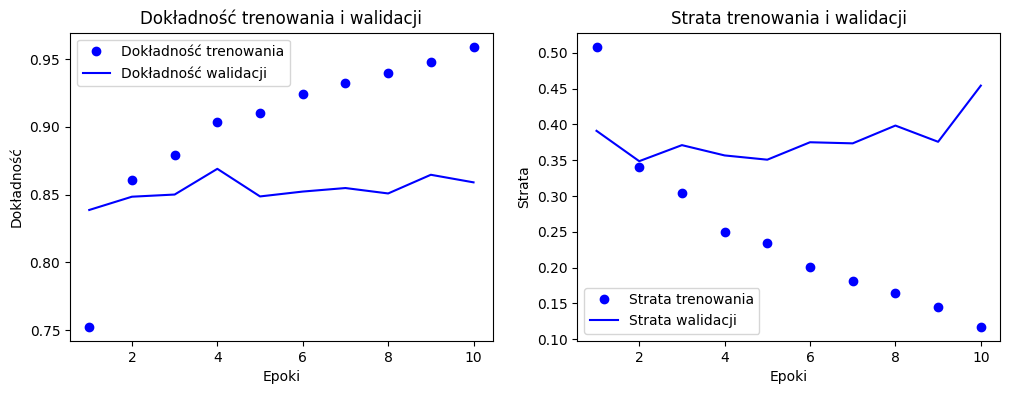

In [24]:
#ARCHITEKTURA RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# parametry
max_features = 10000
maxlen = 500
batch_size = 32

# przygotowanie modelu
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# kompilacja
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# trenowanie modelu na wstępnie obrobionych danych
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

# wykresy dokładności i straty
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Dokładność trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokładność walidacji')
plt.title('Dokładność trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

Z wykresu można odczytać, że dokładność walidacji miała swój szczyt w czwartej epoce, natomiast później jej wartość była nieznacznie większa od tej z samego początku. Być może należałoby zwiększyć ilość epok, żeby zaobserwować pewną zależność. Dokładność trenowania natomiast stale wzrastała, osiągając końcowo wartość bliską 96%.
W przypadku straty walidacji można dostrzec, że tak jak na początku z wartości około 40% zdecydowanie zmalała do wartości 35% (do drugiej epoki), tak po każdej kolejnej, widoczne są ciągłe wahania- wzrosty i spadki. W epoce dziewiątej znowu dostrzegalna jest mniejsza wartośc, ale zaraz po niej- znowu pojawia sie nagły wzrost. Być może również po zrealizowaniu większej ilości epok, można by dostrzec, że po np. 8 epokach następuje wzrost, a podczas tego okresu pomiędzy, zachodzą jedynie niewielkie wahania.
Strata trenowania natomiast nie jest juz tak problematyczna do interpretacji. Widać, że wraz z każdą kolejną epoką osiąga ona coraz mniejszą wartość.